In [3]:
import os
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [4]:
# Specify the folder where images are stored; update this path as needed
cats = "test\cats"
dogs = "test\dogs"

# List image files with .jpg extension
cats_files = [f for f in os.listdir(cats) if f.lower().endswith('.jpg')]
dogs_files = [f for f in os.listdir(dogs) if f.lower().endswith('.jpg')]

# Create a dataframe from the list of image filenames
df_cats = pd.DataFrame(cats_files, columns=['cats_filename'])
df_cats['cats_filepath'] = df_cats['cats_filename'].apply(lambda x: os.path.join(cats, x))
df_cats['cats_filename'] = df_cats['cats_filename'].str.slice(0, -4)
df_cats['cats_pixels'] = df_cats['cats_filepath'].apply(lambda x: Image.open(x))

df_dogs = pd.DataFrame(dogs_files, columns=['dogs_filename'])
df_dogs['dogs_filepath'] = df_dogs['dogs_filename'].apply(lambda x: os.path.join(dogs, x))
df_dogs['dogs_filename'] = df_dogs['dogs_filename'].str.slice(0, -4)
df_dogs['dogs_pixels'] = df_dogs['dogs_filepath'].apply(lambda x: Image.open(x))

# Sorted the Dataframe by filename
df_cats = df_cats.sort_values(by='cats_filename', ascending=True)
df_dogs = df_dogs.sort_values(by='dogs_filename', ascending=True)

In [5]:
# Split df_cats and df_dogs into training and test sets (80% train, 20% test)
df_cats_train, df_cats_test = train_test_split(df_cats, test_size=0.2, random_state=42)
df_dogs_train, df_dogs_test = train_test_split(df_dogs, test_size=0.2, random_state=42)

print("df_cats_train shape:", df_cats_train.shape)
print("df_cats_test shape:", df_cats_test.shape)
print("df_dogs_train shape:", df_dogs_train.shape)
print("df_dogs_test shape:", df_dogs_test.shape)

df_cats_train shape: (56, 3)
df_cats_test shape: (14, 3)
df_dogs_train shape: (56, 3)
df_dogs_test shape: (14, 3)


In [ ]:
# Specify the save directory
save_dir = "/"

# Use the save_dir variable correctly in the file path
df_cats_train.to_csv(f'{save_dir}/cats_train.csv', index=False)
df_dogs_train.to_csv(f'{save_dir}/dogs_train.csv', index=False)
df_cats_test.to_csv(f'{save_dir}/cats_test.csv', index=False)
df_dogs_test.to_csv(f'{save_dir}/dogs_test.csv', index=False)

In [7]:
df_cats_train.head()

,cats_filename,cats_filepath,cats_pixels
62,cat_585,test\cats\cat_585.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...
30,cat_342,test\cats\cat_342.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...
58,cat_564,test\cats\cat_564.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...
35,cat_384,test\cats\cat_384.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...
57,cat_56,test\cats\cat_56.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...


In [8]:
df_cats_train.head()

,cats_filename,cats_filepath,cats_pixels
62,cat_585,test\cats\cat_585.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...
30,cat_342,test\cats\cat_342.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...
58,cat_564,test\cats\cat_564.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...
35,cat_384,test\cats\cat_384.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...
57,cat_56,test\cats\cat_56.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...


In [9]:
df_dogs_train.head()

,dogs_filename,dogs_filepath,dogs_pixels
62,dog_534,test\dogs\dog_534.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...
30,dog_302,test\dogs\dog_302.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...
58,dog_520,test\dogs\dog_520.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...
35,dog_354,test\dogs\dog_354.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...
57,dog_519,test\dogs\dog_519.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...


In [10]:
df_cats_train.head()

,cats_filename,cats_filepath,cats_pixels
62,cat_585,test\cats\cat_585.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...
30,cat_342,test\cats\cat_342.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...
58,cat_564,test\cats\cat_564.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...
35,cat_384,test\cats\cat_384.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...
57,cat_56,test\cats\cat_56.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...


In [11]:
df_dogs_test.head()

,dogs_filename,dogs_filepath,dogs_pixels
22,dog_229,test\dogs\dog_229.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...
0,dog_114,test\dogs\dog_114.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...
49,dog_461,test\dogs\dog_461.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...
4,dog_141,test\dogs\dog_141.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...
54,dog_482,test\dogs\dog_482.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...


In [12]:
train_cats_count = len(df_cats_train)
test_cats_count = len(df_cats_test)
train_dogs_count = len(df_dogs_train)
test_dogs_count = len(df_dogs_test)

print("Number of training cats:", train_cats_count)
print("Number of test cats:", test_cats_count)
print("Number of training dogs:", train_dogs_count)
print("Number of test dogs:", test_dogs_count)

Number of training cats: 56
Number of test cats: 14
Number of training dogs: 56
Number of test dogs: 14


In [13]:
def preprocess_image(image_path):
    img = Image.open(image_path).convert("L")  # Convert to grayscale
    img = img.resize((64, 64))  # Resize for consistency
    img_array = np.array(img).flatten() / 255.0  # Flatten and normalize
    return img_array

In [14]:
# Prepare the training data
X_train = []
y_train = []
for index, row in df_cats_train.iterrows():
    X_train.append(preprocess_image(row['cats_filepath']))
    y_train.append(0)  # 0 for cats
for index, row in df_dogs_train.iterrows():
    X_train.append(preprocess_image(row['dogs_filepath']))
    y_train.append(1)  # 1 for dogs
X_train = np.array(X_train)
y_train = np.array(y_train)

In [15]:
# Prepare the test data
X_test = []
y_test = []
for index, row in df_cats_test.iterrows():
    X_test.append(preprocess_image(row['cats_filepath']))
    y_test.append(0)
for index, row in df_dogs_test.iterrows():
    X_test.append(preprocess_image(row['dogs_filepath']))
    y_test.append(1)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [16]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, 2) # Output layer for 2 classes

    def forward(self, x):
      x = self.fc1(x)
      x = self.relu(x)
      x = self.fc2(x)
      return x
# Hyperparameter search space
batch_sizes = [2, 4]
learning_rates = [1e-3, 1e-5]
input_size = X_train.shape[1]
hidden_size = 16

# Initialize lists to store results
results = []

Batch Size: 2, Learning rate: 0.001, Accuracy: 0.5, F1 Score: 0.0
Batch Size: 2, Learning rate: 1e-05, Accuracy: 0.5, F1 Score: 0.6666666666666666
Batch Size: 4, Learning rate: 0.001, Accuracy: 0.5, F1 Score: 0.0
Batch Size: 4, Learning rate: 1e-05, Accuracy: 0.4642857142857143, F1 Score: 0.4444444444444444
-------------------------
Batch Size: 2, Learning Rate: 0.001
Accuracy: 0.5, F1 Score: 0.0
Confusion Matrix:
[[14  0]
 [14  0]]


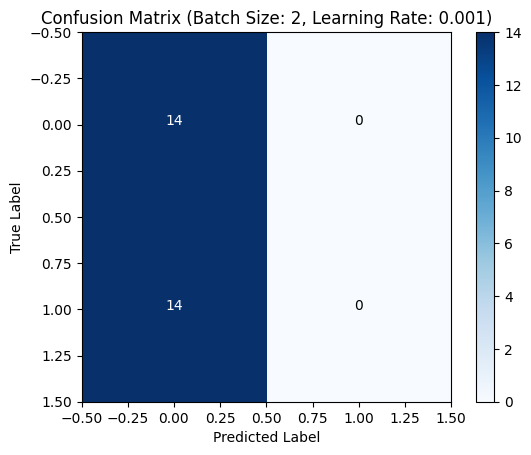

Batch Size: 2, Learning Rate: 1e-05
Accuracy: 0.4642857142857143, F1 Score: 0.0
Confusion Matrix:
[[13  1]
 [14  0]]


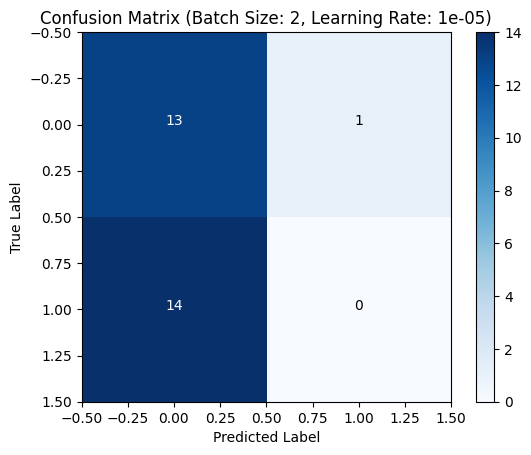

Batch Size: 4, Learning Rate: 0.001
Accuracy: 0.5714285714285714, F1 Score: 0.6
Confusion Matrix:
[[7 7]
 [5 9]]


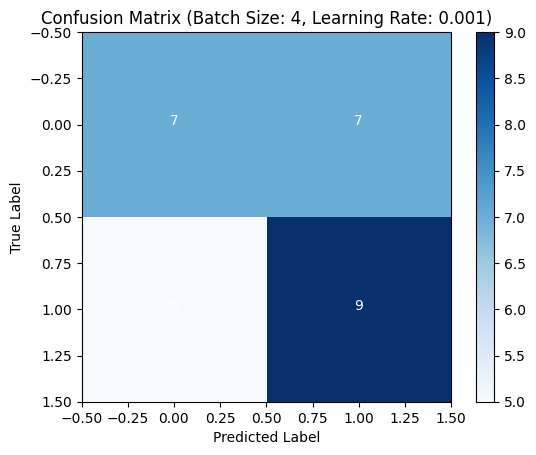

Batch Size: 4, Learning Rate: 1e-05
Accuracy: 0.5, F1 Score: 0.5
Confusion Matrix:
[[7 7]
 [7 7]]


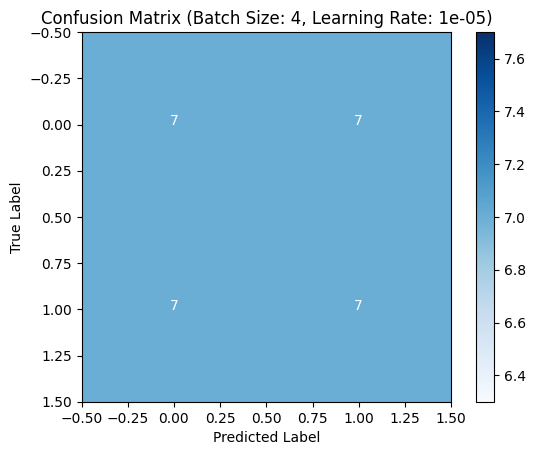

Batch Size: 2, Learning Rate: 0.001
Accuracy: 0.5, F1 Score: 0.0
Confusion Matrix:
[[14  0]
 [14  0]]


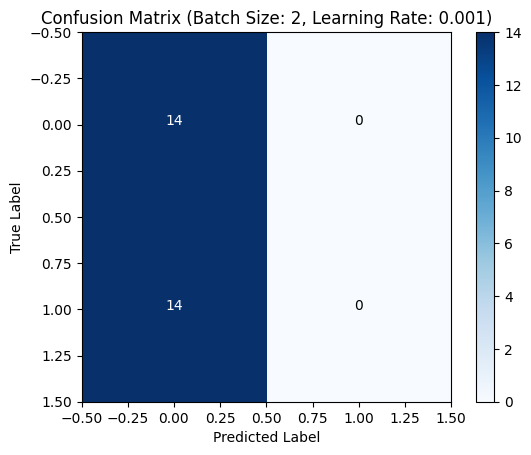

Batch Size: 2, Learning Rate: 1e-05
Accuracy: 0.5, F1 Score: 0.6666666666666666
Confusion Matrix:
[[ 0 14]
 [ 0 14]]


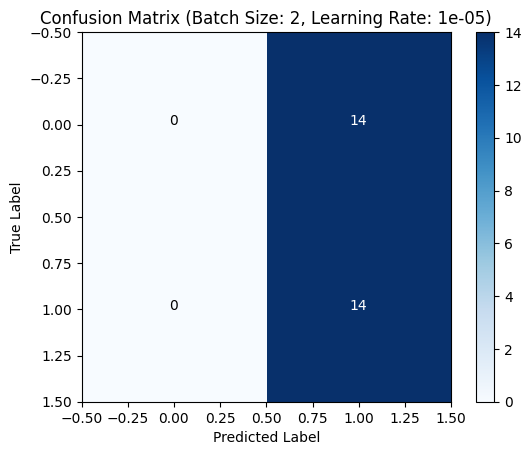

Batch Size: 4, Learning Rate: 0.001
Accuracy: 0.5, F1 Score: 0.0
Confusion Matrix:
[[14  0]
 [14  0]]


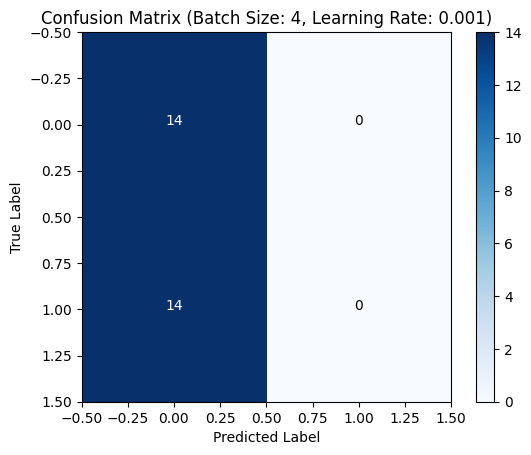

Batch Size: 4, Learning Rate: 1e-05
Accuracy: 0.4642857142857143, F1 Score: 0.4444444444444444
Confusion Matrix:
[[7 7]
 [8 6]]


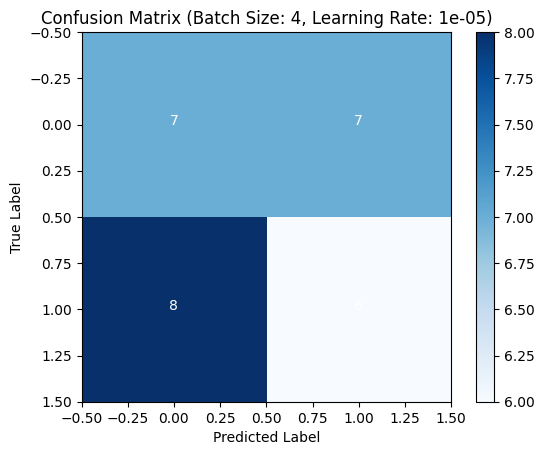

In [18]:
for batch_size in batch_sizes:
  for lr in learning_rates:
    # Create model, optimizer, and loss function
    model = Net(input_size, hidden_size)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    loss_fn = nn.CrossEntropyLoss()

    #Convert data to tensors
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.long)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test, dtype=torch.long)

    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    # Training loop (one epoch)
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

    #Evaluation
    model.eval()
    with torch.no_grad():
      y_pred = model(X_test_tensor)
      _, predicted = torch.max(y_pred, 1)

      accuracy = accuracy_score(y_test, predicted)
      f1 = f1_score(y_test, predicted)
      cm = confusion_matrix(y_test, predicted)

    results.append({
      'batch_size':batch_size,
      'learning_rate':lr,
      'accuracy': accuracy,
      'f1_score': f1,
      'confusion_matrix':cm
    })
    print(f"Batch Size: {batch_size}, Learning rate: {lr}, Accuracy: {accuracy}, F1 Score: {f1}")

print('-'*25)

# Display results with numbers shown on the confusion matrices
for result in results:
    print(f"Batch Size: {result['batch_size']}, Learning Rate: {result['learning_rate']}")
    print(f"Accuracy: {result['accuracy']}, F1 Score: {result['f1_score']}")
    print(f"Confusion Matrix:\n{result['confusion_matrix']}")
    plt.figure()
    plt.imshow(result['confusion_matrix'], cmap='Blues', interpolation='nearest')
    plt.title(f"Confusion Matrix (Batch Size: {result['batch_size']}, Learning Rate: {result['learning_rate']})")
    plt.colorbar()
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    # Annotate each cell with its value
    thresh = result['confusion_matrix'].max() / 2.
    for i in range(result['confusion_matrix'].shape[0]):
        for j in range(result['confusion_matrix'].shape[1]):
            plt.text(j, i, format(result['confusion_matrix'][i, j], 'd'),
                     horizontalalignment="center",
                     color="white" if result['confusion_matrix'][i, j] > thresh else "black")
    plt.show()
